# Import Libraries

In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Check if link/path works

In [2]:
# print('Landsat on AWS:')
# filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'

filepath = 'Data/LE07_L1TP_116050_20030508_20170125_01_T1/LE07_L1TP_116050_20030508_20170125_01_T1_B3.tif'
with rasterio.open(filepath) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7861, 'height': 7071, 'count': 1, 'crs': CRS({'init': 'epsg:32651'}), 'transform': Affine(30.0, 0.0, 146685.0,
       0.0, -30.0, 1705815.0), 'tiled': False, 'interleave': 'band'}


# Print an overview with the out of bounds as NaN

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7861, 'height': 7071, 'count': 1, 'crs': CRS({'init': 'epsg:32651'}), 'transform': Affine(30.0, 0.0, 146685.0,
       0.0, -30.0, 1705815.0), 'tiled': False, 'interleave': 'band'}


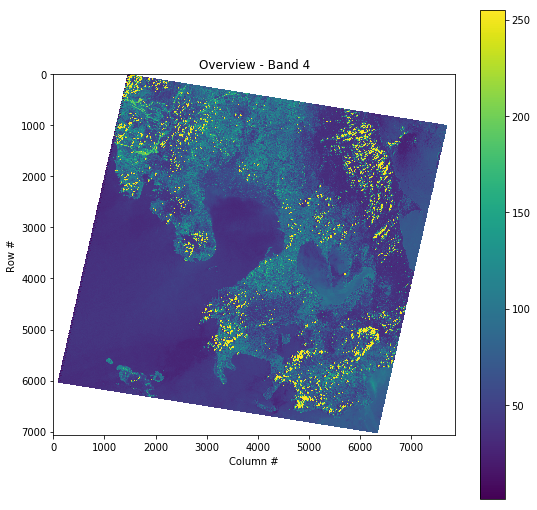

In [3]:
with rasterio.open(filepath) as src:
    print(src.profile)
    #read the entire array
    image = src.read(1)
    
    image = image.astype('f4')
    image[image==0] = np.nan
    
plt.figure(figsize=(9,9))
plt.imshow(image)
plt.colorbar()
plt.title('Overview - Band 3')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# Sample Computation: NDVI and NDWI

In [4]:
date = '2003-05-08'
main_file = 'Data/LE07_L1TP_116050_20030508_20170125_01_T1/'
redband = 'LE07_L1TP_116050_20030508_20170125_01_T1_B3.tif'
nirband = 'LE07_L1TP_116050_20030508_20170125_01_T1_B4.tif'
greenband = 'LE07_L1TP_116050_20030508_20170125_01_T1_B2.tif'

## Red Band

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7861, 'height': 7071, 'count': 1, 'crs': CRS({'init': 'epsg:32651'}), 'transform': Affine(30.0, 0.0, 146685.0,
       0.0, -30.0, 1705815.0), 'tiled': False, 'interleave': 'band'}


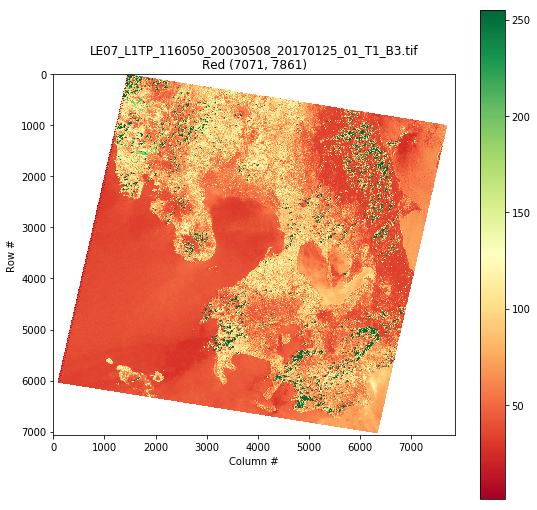

In [5]:
with rasterio.open(main_file + redband) as src:
    print(src.profile)
    #read the entire array
    red = src.read(1)
    
    # convert the datatype from uint16 to float32
    red = red.astype('f4')
    red[red==0] = np.nan
    
plt.figure(figsize=(9,9))
plt.imshow(red, cmap = 'RdYlGn')
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

## Near Infrared Band

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7861, 'height': 7071, 'count': 1, 'crs': CRS({'init': 'epsg:32651'}), 'transform': Affine(30.0, 0.0, 146685.0,
       0.0, -30.0, 1705815.0), 'tiled': False, 'interleave': 'band'}


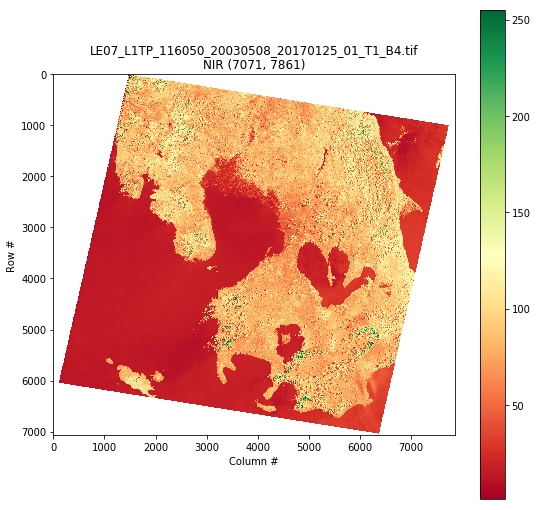

In [6]:
with rasterio.open(main_file + nirband) as src:
    print(src.profile)
    #read the entire array
    nir = src.read(1)
    
    # convert the datatype from uint16 to float32
    nir = nir.astype('f4')
    nir[nir==0] = np.nan
    
plt.figure(figsize=(9,9))
plt.imshow(nir, cmap = 'RdYlGn')
plt.colorbar()
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# Green Band

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7861, 'height': 7071, 'count': 1, 'crs': CRS({'init': 'epsg:32651'}), 'transform': Affine(30.0, 0.0, 146685.0,
       0.0, -30.0, 1705815.0), 'tiled': False, 'interleave': 'band'}


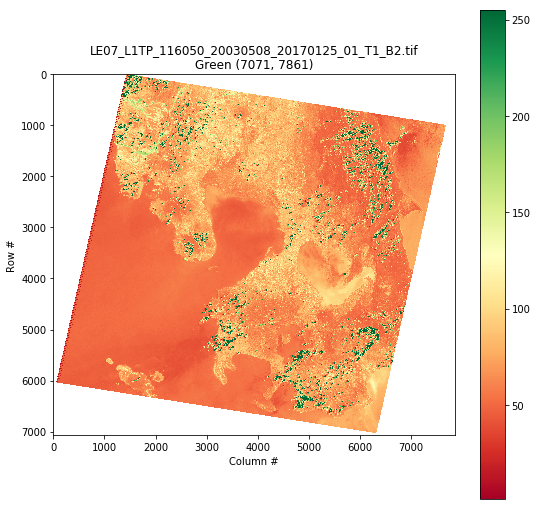

In [7]:
with rasterio.open(main_file + greenband) as src:
    print(src.profile)
    #read the entire array
    green = src.read(1)
    
    # convert the datatype from uint16 to float32
    green = green.astype('f4')
    green[green==0] = np.nan
    
plt.figure(figsize=(9,9))
plt.imshow(green, cmap = 'RdYlGn')
plt.colorbar()
plt.title('{}\nGreen {}'.format(greenband, green.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

## NDVI Calculation Function

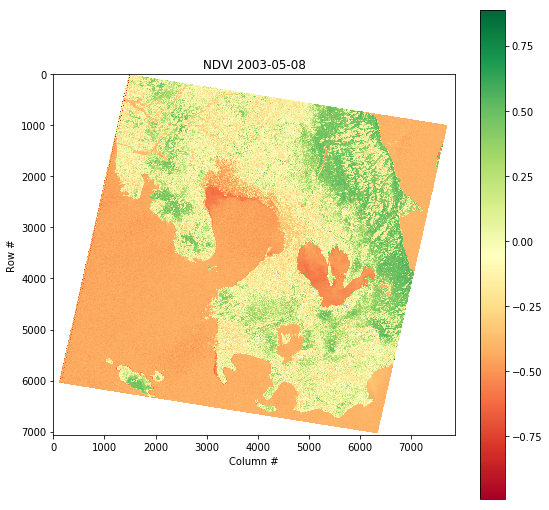

In [8]:
def calc_ndvi(nir, red):
    ''' Calculate NDVI from integer arrays '''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

plt.figure(figsize=(9,9))
ndvi = calc_ndvi(nir, red)

# convert the datatype from uint16 to float32
ndvi = ndvi.astype('f4')
ndvi[ndvi==0] = np.nan
    
plt.imshow(ndvi, cmap = 'RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# NDWI Calculation Function

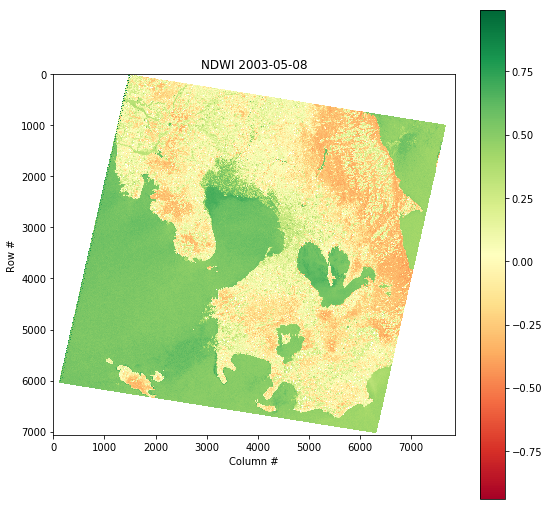

In [9]:
def calc_ndwi(nir, green):
    ''' Calculate NDWI from integer arrays '''
    nir = nir.astype('f4')
    green = green.astype('f4')
    ndwi = (green - nir) / (green + nir)
    return ndwi

plt.figure(figsize=(9,9))
ndwi = calc_ndwi(nir, green)

# convert the datatype from uint16 to float32
ndwi = ndwi.astype('f4')
ndwi[ndwi==0] = np.nan
    
plt.imshow(ndwi, cmap = 'RdYlGn')
plt.colorbar()
plt.title('NDWI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

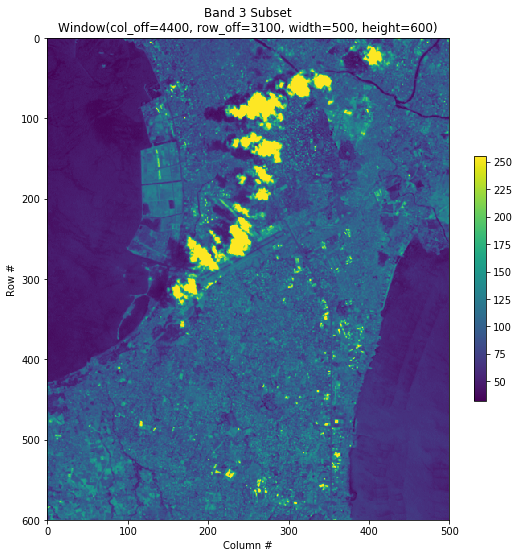

In [21]:
window = rasterio.windows.Window(4400, 3100, 500, 600)

with rasterio.open(filepath) as src:
    subset = src.read(1, window = window)
    
plt.figure(figsize = (9, 9))
plt.imshow(subset)
plt.colorbar(shrink = 0.5)
plt.title(f'Band 3 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()